In [17]:
import gzip
import os

import argparse
import datetime
import requests
import time
import  urllib,json
from requests_oauthlib import OAuth1

In [18]:
answer = 'progressiveinsurance'
cnt = 200
print(answer)
dt=str(datetime.date.today()).replace('-','')
ts = datetime.datetime.fromtimestamp(time.time()).strftime('%Y%m%d_%H%M%S')
print(ts)
directory='tweets'
if not os.path.exists(directory+'/'+str(answer)):
    os.makedirs(directory+'/'+str(answer))
    if not os.path.exists(directory+'/'+str(answer)+'/'+dt):
        os.makedirs(directory+'/'+str(answer)+'/'+str(dt))
else:
    if not os.path.exists(directory+'/'+str(answer)+'/'+dt):
        os.makedirs(directory+'/'+str(answer)+'/'+str(dt))

progressiveinsurance
20180523_092303


In [19]:
url = 'https://api.twitter.com/1.1/account/verify_credentials.json'
rq=requests.get(url, auth=oauth)
#print(rq)

r=requests.get('https://api.twitter.com/1.1/search/tweets.json?q='+str(answer)+'&count='+str(cnt),auth=oauth)
data=r.json()
tweets=[]
tweet_dict={}

if(data.get("statuses",'none')!='none'):
    tweets=data.get("statuses",'none')
    #print(tweets)

for i in range(0,len(tweets)):
    tweet_dict=tweets[i]
    userid=str(tweet_dict['user']['id'])
    createdat=tweet_dict['created_at']
    #cr=time.strftime("%Y%m%d_%H%M%S",tweet_dict['user']['created_at'])
    '''createdat.replace(' ',"")
    createdat.replace('+',"")
    cr=createdat.replace('0000',"")'''
    cr=createdat.replace('+0000 ',"")
    tm=time.strptime(cr)
    #print(time.struct_time(tm_year))
    print(str(tm[5]))

    with open('Processed_tweets/'+str(answer)+'_'+str(userid)+'_'+str(tm[0])+str('{0:02d}'.format(tm[1]))+str('{0:02d}'.format(tm[2]))+'_'+str('{0:02d}'.format(tm[3]))+str('{0:02d}'.format(tm[4]))+str('{0:02d}'.format(tm[5]))+'.json', 'w') as outfile:
        json.dump(tweets[i], outfile)
    #print(time.strftime("%Y%m%d_%H%M%S",time.localtime(cr)))

with open(directory+'/'+str(answer)+'/'+str(dt)+'/'+str(answer)+'_'+str(ts)+'.json', 'w') as outfile:
    json.dump(r.json(), outfile)


45
29
29
33
38
31
59
59
29
0
59
46
35
50
50
49
55
26
8
38
8
38
8
38
9
38
9
38
38
7
5
37
7
7
37
38
37
38
38
47
45
34
3
33
4
33
52
55
55
1
58
13
29


In [20]:
import os
import json
import time
count=0
loc="Processed_tweets"
row=[]
row.append('searchterm,userid,created_year,created_month,created_date,created_hour,created_min,created_sec,retweet_count,favorite_count,friends_count,followers_count,tweet\n')
for filename in os.listdir(loc):
    if filename.endswith(".json"):
        searchterm=filename[:filename.find('_')]
        remterm=filename[filename.find('_')+1:]
        userid=remterm[:remterm.find('_')]

    
        with open(loc+'/'+filename) as data_file:
            data = json.load(data_file)
            createdat=data['created_at']
            cr=createdat.replace('+0000 ',"")
            tm=time.strptime(cr)
            row.append(searchterm+','+userid+','+str(tm[0])+','+str('{0:02d}'.format(tm[1]))+','+str('{0:02d}'.format(tm[2]))+','+str('{0:02d}'.format(tm[3]))+','+str('{0:02d}'.format(tm[4]))+','+str('{0:02d}'.format(tm[2]))+','+str(data['retweet_count'])+','+str(data['favorite_count'])+','+str(data['user']['friends_count'])+','+str(data['user']['followers_count'])+','+str(data['text']).replace(',','').replace('\n','')+'\n')

with open('processed.csv','w') as f:
    for s in row:
        f.write(s)

In [21]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
df=pd.read_csv("processed.csv")
df2=df[['tweet']]
df2

,tweet
0,#ProgressiveInsurance #GuardianLifeInsurance Insurance agent says Schenectady man called to collect on murdered fr… https://t.co/Vxl8trHDhJ
1,#AarpInsurance #ProgressiveInsurance GEICO's Top Tips to Help Prepare for Hailstorms https://t.co/T9jSJyvNah https://t.co/QSoQtMLCXj
2,#CitizensInsurance #ProgressiveInsurance BRIEF-Citizens Inc Says Decided To Discontinue Accepting Life Insurance A… https://t.co/68g4yWgjSJ
3,#ProgressiveInsurance #ChubbInsurance Ringleader in $23M insurance fraud lived 'lavish lifestyle' with Bentley $6… https://t.co/VaQVZ3o9VI
4,#CheapCarInsurance #ProgressiveInsurance Mercury Insurance Group (NYSE:MCY) to Issue $0.63 Quarterly Dividend… https://t.co/sI7irUT4Ms
5,#ProgressiveInsurance #GeicoInsurance Mercury Insurance Group (NYSE:MCY) to Issue $0.63 Quarterly Dividend… https://t.co/LkCo0SWk94
6,#AigInsurance #ProgressiveInsurance Ringleader in $23M insurance fraud lived 'lavish lifestyle' with Bentley $64G… https://t.co/7jlenUy6OT
7,#CitizensInsurance #ProgressiveInsurance Health Insurance Companies Mostly Ask for Rate Increases… https://t.co/TST8N8YrvM
8,@Progressive Why do your commercials featuring the spokesman Jamie seem antagonistic to your product? An entire co… https://t.co/271GaYL3lB
9,#MarketplaceInsurance #ProgressiveInsurance Consumers Brace For Premium Hikes While Lawmakers Grasp At Remedies… https://t.co/fvyhuXOGqB


In [22]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [23]:
pos_count = 0
neg_count = 0
df=pd.read_csv("processed.csv")
df["positivity"]=0.000
df["negativity"]=0.000
#print(df)
for i in range(0,len(df)):
    blob = TextBlob(df["tweet"][i], analyzer=NaiveBayesAnalyzer())
    df["positivity"][i]=blob.sentiment.p_pos*100
    df["negativity"][i]=blob.sentiment.p_neg*100
    print(blob.sentiment)
    if blob.sentiment.classification == 'pos':
        pos_count+=blob.sentiment.p_pos
    if blob.sentiment.classification == 'neg':
        neg_count+=blob.sentiment.p_neg
pos_count=float(pos_count/len(df))
neg_count=float(neg_count/len(df))

print("Overall positivity score:"+str(pos_count))
print("Overall negativity score:"+str(neg_count))
#print(df["Type"][i])

/home/kishore/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/kishore/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Sentiment(classification='pos', p_pos=0.7422277204696377, p_neg=0.25777227953036164)
Sentiment(classification='pos', p_pos=0.6231678220183893, p_neg=0.37683217798161056)
Sentiment(classification='pos', p_pos=0.865118833424719, p_neg=0.13488116657528096)
Sentiment(classification='pos', p_pos=0.9474943101054024, p_neg=0.05250568989459893)
Sentiment(classification='pos', p_pos=0.8215701712453941, p_neg=0.17842982875460506)
Sentiment(classification='pos', p_pos=0.8215701712453941, p_neg=0.17842982875460506)
Sentiment(classification='pos', p_pos=0.9474943101054024, p_neg=0.05250568989459893)
Sentiment(classification='pos', p_pos=0.7781477638060312, p_neg=0.22185223619396827)
Sentiment(classification='neg', p_pos=0.45291411981758023, p_neg=0.547085880182419)
Sentiment(classification='pos', p_pos=0.9058434503410842, p_neg=0.09415654965891476)
Sentiment(classification='pos', p_pos=0.8928834808259589, p_neg=0.10711651917404119)
Sentiment(classification='pos', p_pos=0.9721918438539988, p_neg=0.0

In [24]:
pos_count/len(df)

0.010323717964514005

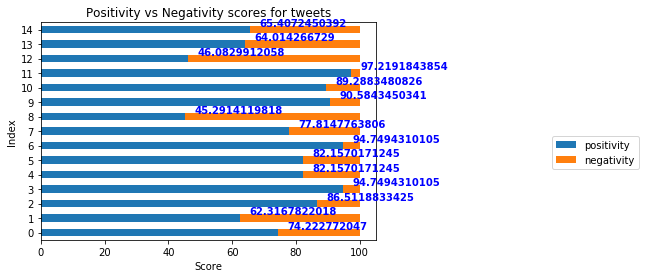

In [25]:
df2=df[['positivity','negativity']].head(15)
ax=df2.plot(kind='barh', stacked=True,title = "Positivity vs Negativity scores for tweets",legend=False)
ax.legend(bbox_to_anchor=(1.8, 0.5))
ax.set_xlabel("Score")
ax.set_ylabel("Index")
for i, v in enumerate(df2['positivity']):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')